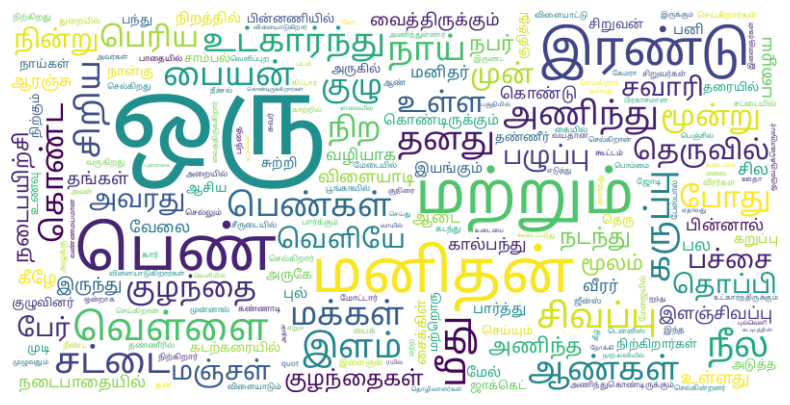

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import os
import string

# Path to the uploaded font file
fontpath = '/content/drive/MyDrive/Colab Notebooks/thesis/Noto_Sans_Tamil/static/NotoSansTamil-Regular.ttf'

# Directory where text files are located
data_dir = '/content/drive/MyDrive/Colab Notebooks/thesis/MMDravi/'

train_captions_files = [
    os.path.join(data_dir, 'train.lc.norm.tok.1.google.ta'),
    os.path.join(data_dir, 'train.lc.norm.tok.2.google.ta'),
    os.path.join(data_dir, 'train.lc.norm.tok.3.google.ta')
]

combined_text = ""

# Remove punctuation translator
translator = str.maketrans('', '', string.punctuation)

for file_path in train_captions_files:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().translate(translator)
        combined_text += text

# Count word frequencies
words = combined_text.split()
word_freq = Counter(words)

# Generate the word cloud from frequencies
wordcloud = WordCloud(
    font_path=fontpath,
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from glob import glob
import shutil

# Define directories
flickr_30k_dir = "/content/drive/MyDrive/Colab Notebooks/thesis/MMDravi/flickr30k_images/flickr30k_images"
generated_images_dirs = {
    "sd2_base": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-base/generated_images",
    "sd2_v1_4": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/generated_images",
    "sd2_v1_5": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-5/generated_images"
}

real_images_dirs = {
    "sd2_base": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-base/real_images",
    "sd2_v1_4": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/real_images",
    "sd2_v1_5": "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-5/real_images"
}

for dir_path in real_images_dirs.values():
    os.makedirs(dir_path, exist_ok=True)


In [ ]:
!pip install torch-fidelity
import torch_fidelity


In [ ]:
from PIL import Image

def resize_images_in_directory(directory, target_size=(299, 299)):
    for img_path in glob(os.path.join(directory, "*.*")):
        with Image.open(img_path) as img:
            img_resized = img.resize(target_size)
            img_resized.save(img_path)

# Resize images for each model's real images and generated images
for real_dir in real_images_dirs.values():
    resize_images_in_directory(real_dir)

for gen_dir in generated_images_dirs.values():
    resize_images_in_directory(gen_dir)

In [ ]:
generated_images_dir_v1_4 = "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/generated_images"
real_images_dir_v1_5 = "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/real_images"
import torch_fidelity

# Calculate FID score for the sd2_v1_4 model
print("Calculating FID score for sd2_v1_4...")
fid_value = torch_fidelity.calculate_metrics(
    input1=real_images_dir_v1_5,
    input2=generated_images_dir_v1_4,
    fid=True,
    verbose=True,
    cuda=False
)

print(f"FID score for sd2_v1_4: {fid_value['frechet_inception_distance']}")

Calculating FID score for sd2_v1_4...


Creating feature extractor "inception-v3-compat" with features ['2048']
Extracting statistics from input 1
Looking for samples non-recursivelty in "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/real_images" with extensions png,jpg,jpeg
Found 64 samples, some are lossy-compressed - this may affect metrics
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Processing samples
Extracting statistics from input 2
Looking for samples non-recursivelty in "/content/drive/MyDrive/Colab Notebooks/thesis/evaluation/sd2-v1-4/generated_images" with extensions png,

FID score for sd2_v1_4: 266.3553313821784


Frechet Inception Distance: 266.3553313821784


In [ ]:
import torch
import os

# Load the saved embeddings and captions file
file_save_path = '/content/drive/MyDrive/Colab Notebooks/thesis/embeddings/labse/labse_test_2016_embeddings.pth'
data = torch.load(file_save_path)

# Remove '.jpg' extension from the filenames in base_filenames_sd2_v1_4
base_filenames_sd2_v1_4_stripped = {filename.replace('.jpg', '') for filename in base_filenames_sd2_v1_4}

# Create a dictionary to hold captions for each image
image_captions = {}

# Match filenames in the embeddings file with those in `base_filenames_sd2_v1_4_stripped`
for entry in data:
    image_filename = os.path.splitext(os.path.basename(entry['image_path']))[0]

    # Check if this filename is in the list of base filenames
    if image_filename in base_filenames_sd2_v1_4_stripped:
        image_captions[image_filename] = entry['caption']

# Print out the captions corresponding to the images in the v1-4 model
if image_captions:
    print("Captions for matched images:")
    for image_filename, caption in image_captions.items():
        print(f"Image: {image_filename}, Caption: {caption}")
else:
    print("No matching images found.")

Captions for matched images:
Image: 1007129816, Caption: ஒரு ஆரஞ்சு தொப்பி ஒரு மனிதன் ஏதாவது நடித்தார்.
Image: 1009434119, Caption: ஒரு போஸ்டன் டெரியர் ஒரு வெள்ளை வேலி முன் பசுமையான புல் இயங்கும்.
Image: 101362133, Caption: கரேட் சீருடையில் ஒரு பெண் முன் ஒரு கிக் ஒரு குச்சி உடைத்து.
Image: 102617084, Caption: குளிர்கால ஜாக்கெட்டுகள் மற்றும் தலைக்கவசங்களுடன் அணிந்துகொண்டிருக்கும் ஐந்து பேர் பனிப்பகுதியில் நிற்கிறார்கள், பின்னணியில் பனிமலைகள் உள்ளன.
Image: 10287332, Caption: மக்கள் ஒரு வீட்டின் கூரையை சரிசெய்கின்றனர்.
Image: 1039637574, Caption: ஒளி வண்ண ஆடை ஒரு மனிதன் ஒரு strapless கவுன் அணிந்து ஒரு பெண் சுற்றி நின்று இருண்ட வழக்குகள் மற்றும் தொப்பிகள் அணிந்து ஆண்கள் ஒரு குழு புகைப்பட.
Image: 1043819504, Caption: ஒரு igloo முன் நின்று மக்கள் குழு.
Image: 1043910339, Caption: ஒரு சிவப்பு சீருடையில் ஒரு பையன் வீட்டை தட்டில் வெளியே வர முயற்சிக்கிறான், நீல சீருடையில் பிடிப்பவன் அவரை பிடிக்க முயற்சிக்கிறான்.
Image: 1044798682, Caption: ஒரு பையன் ஒரு கட்டிடத்தில் வேலை செய்கிறான்.
Image: 10712